# BIOS 512 Data Visualization- Women In STEM

## Data: College Majors by Gender

For this data visualization, a dataset containing information about the gender distribution of different college majors and major areas was obtained from the FiveThirtyEight Github. The dataset (women-stem.csv) contains a list of college majors with their more generalized associated major categories (Engineering, Physical Sciences, Computers & Mathematics, Health, Biology & Life Science), which are from Carnevale et al, "What's It Worth?: The Economic Value of College Majors." Georgetown University Center on Education and the Workforce, 2011. http://cew.georgetown.edu/whatsitworth. The dataset also contains information from the American Community Survey 2010-2012 Public Use Microdata Series regarding the total number of men and women in each major during this time frame, as well as a column indicating the proportion of women in each major (ShareWomen). A preview of this dataset is shown below:

In [6]:
df = read.csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/women-stem.csv')
head(df)

Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<int>
1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.1205643,110000
2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.1018519,75000
3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.1530374,73000
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.1073132,70000
5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.1449670,65000
6,2405,CHEMICAL ENGINEERING,Engineering,32260,21239,11021,0.3416305,65000


## Data Cleaning (Visualization #1)

To further analyze the gender distribution of different collge major categories, it was necessary to create a column containing the proportion of men in each major (ShareMen). In addition, the dataset was grouped by major category and the average proportion of men and women in each major category was calculated, creating the Total_Men and Total_Women columns, labled as "Female Students" and "Male Students". The final dataset used for the visualization contained only the Major_Category, Total_Women, and Total_Men columns, as shown below. 

In [7]:
library('tidyverse')
library(forcats)

#Create ShareMen Column (Proportion of Men by Major)
df$ShareMen <- with(df,(Men / Total))

#DATA CLEANING: MAJOR CATEGORY BY GENDER (AVERAGE PROPORTION OF MEN vs. WOMEN by MAJOR CATEGORY)
df = df %>% group_by(Major_category)  %>% summarise(Total_Women = (mean(ShareWomen)*100), Total_Men = (mean(ShareMen)*100))


names(df)[2] <- "Female Students"
names(df)[3] <- "Male Students"

## Which Major Categories Have the Most Women?

As shown below, women tend to dominate the health field while the the fields of engineering and computer science & mathematics are largely dominanted by male students.

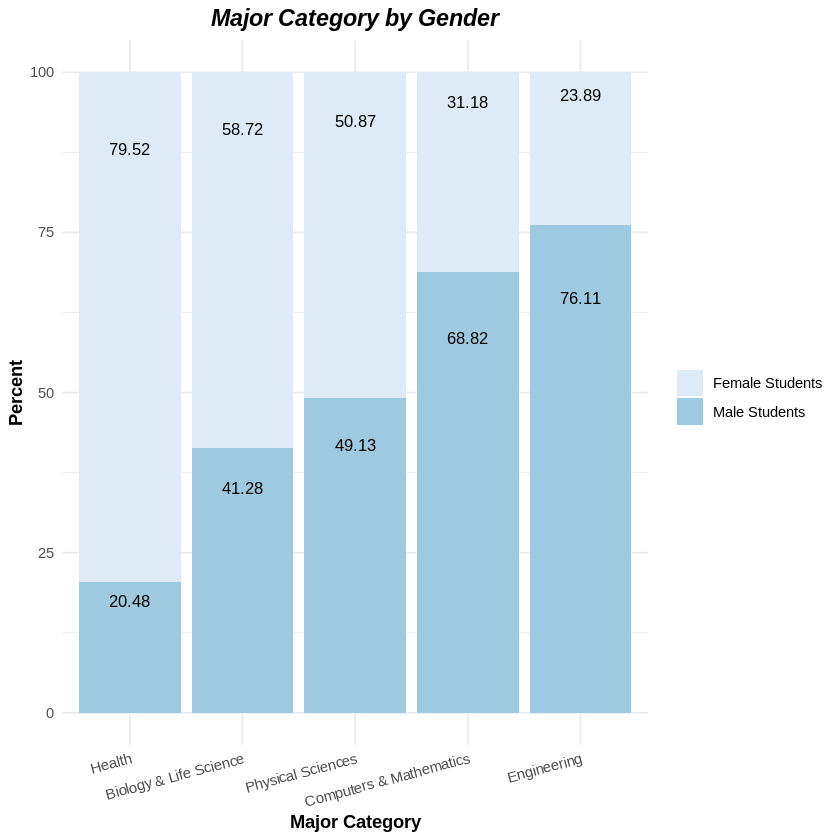

In [8]:
#PLOT OF MAJOR CATEGORY BY GENDER (AVERAGE PROPORTION OF MEN vs. WOMEN)
options(repr.plot.width=10, repr.plot.height=8)
p2 = ggplot(data = df %>% gather(Variable, value, -Major_category), 
       aes(x = reorder(Major_category, value), y = value, fill = Variable, some_dummy_mapping = value[Variable])) + geom_bar(stat = 'identity', position = 'stack')
p2 = p2 +  theme(panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank()) 
p2 = p2 + xlab("Major Category") + ylab("Percent") + ggtitle("Major Category by Gender") +  geom_text(aes(label=sprintf("%0.2f", round(value, digits = 2))), position= position_stack(vjust = 0.85), size=3.5) + scale_fill_brewer(palette="Blues") + theme_minimal()+ theme(axis.text.x = element_text(angle = 15, hjust = 1)) + theme(plot.title = element_text(hjust = 0.5)) + theme(legend.title = element_blank())

p2 = p2 + theme(plot.title = element_text(size=14, face="bold.italic"), axis.title.x = element_text(face="bold"),
axis.title.y = element_text(face="bold")) 
p2

## Data Cleaning (Visualization #2)

Each of these major categories consists of many majors. To further examine which specific college majors are most popular amongst female students and male students, I subsetted the data to only contain the top 10 college majors with the highest proportion of female students as well as the top 10 college majors with the highest proportion of male students. These datasets (named mostwomen and mostmen) as well as their respective barplots showing the gender distributions for these majors are shown below. 

In [17]:
#COLLEGE MAJORS WITH HIGHEST PROPORTION OF WOMEN (TOP WOMEN'S COLLEGE MAJORS)
df = read.csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/women-stem.csv')
#Create ShareMen Column (Proportion of Men by Major)

df$ShareWomen = with(df,(ShareWomen*100))
df$ShareMen = with(df,(Men/ Total)*100)

mostwomen = top_n(df, n=10,ShareWomen) %>% arrange(desc(ShareWomen))
mostwomen = mostwomen[ -c(1,2,4,5,6,7,9)]

names(mostwomen)[2] <- "Female Students"
names(mostwomen)[3] <- "Male Students"
print(mostwomen)

#COLLEGE MAJORS WITH HIGHEST PROPORTION OF MEN (TOP MEN'S COLLEGE MAJORS)
mostmen = top_n(df, n=10,ShareMen) %>% arrange(desc(ShareMen))
mostmen = mostmen[ -c(1,2,4,5,6,7,9)]

names(mostmen)[2] <- "Female Students"
names(mostmen)[3] <- "Male Students"
print(mostmen)

                                                        Major Female Students
1               COMMUNICATION DISORDERS SCIENCES AND SERVICES        96.79981
2                                  MEDICAL ASSISTING SERVICES        92.78072
3                                                     NURSING        89.60190
4                    MISCELLANEOUS HEALTH MEDICAL PROFESSIONS        88.12939
5                                          NUTRITION SCIENCES        86.44561
6                                 COMMUNITY AND PUBLIC HEALTH        79.20953
7                         GENERAL MEDICAL AND HEALTH SERVICES        77.45766
8                  HEALTH AND MEDICAL ADMINISTRATIVE SERVICES        76.44265
9                            MEDICAL TECHNOLOGIES TECHNICIANS        75.39274
10 NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL TECHNOLOGIES        75.04726
   Male Students
1       3.200188
2       7.219275
3      10.398101
4      11.870611
5      13.554392
6      20.790474
7      22.542338
8     

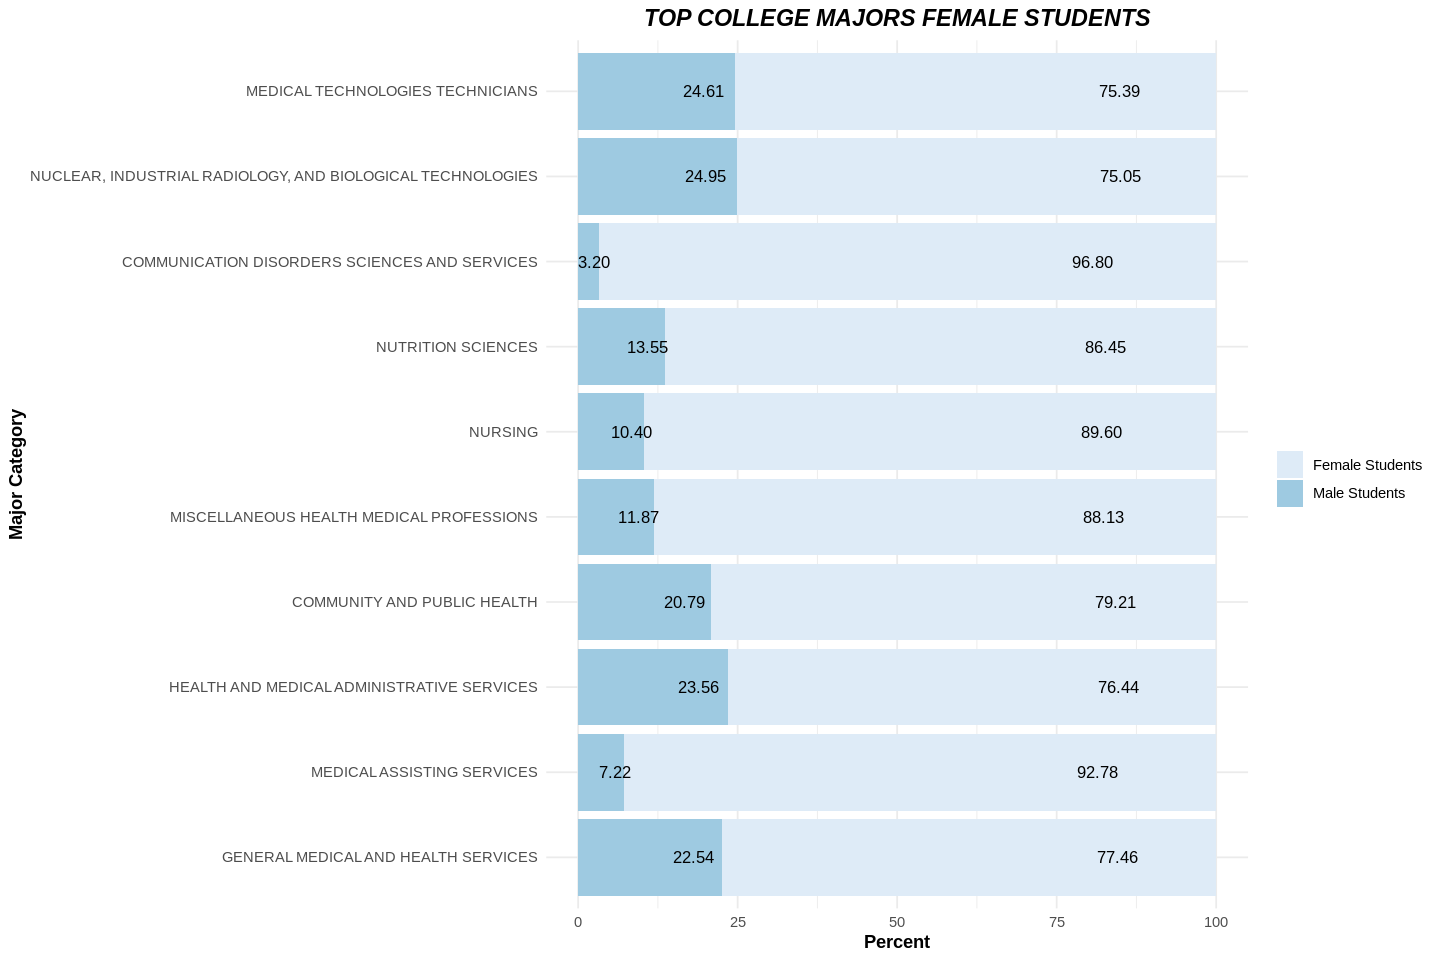

In [15]:
#TOP WOMEN'S COLLEGE MAJORS PLOT
options(repr.plot.width=12, repr.plot.height=8)
p3 = p2 = ggplot(data = mostwomen %>% gather(Variable, value, -Major), 
       aes(x = reorder(Major, value), y = value, fill = Variable, some_dummy_mapping = value[Variable])) + geom_bar(stat = 'identity', position = 'stack')
p3 = p3 +  theme(panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank()) 
p3 = p3 + xlab("Major Category") + ylab("Percent") + ggtitle("TOP COLLEGE MAJORS FEMALE STUDENTS") +  geom_text(aes(label=sprintf("%0.2f", round(value, digits = 2))), position= position_stack(vjust = 0.8), size=3.5) + scale_fill_brewer(palette="Blues") + theme_minimal()+ theme(plot.title = element_text(hjust = 0.5)) + theme(legend.title = element_blank()) + coord_flip()

p3 = p3 + theme(plot.title = element_text(size=14, face="bold.italic"), axis.title.x = element_text(face="bold"),
axis.title.y = element_text(face="bold")) 
#p3 = ggplotly(p3, tooltip = c("value")) %>% as_widget() 
p3

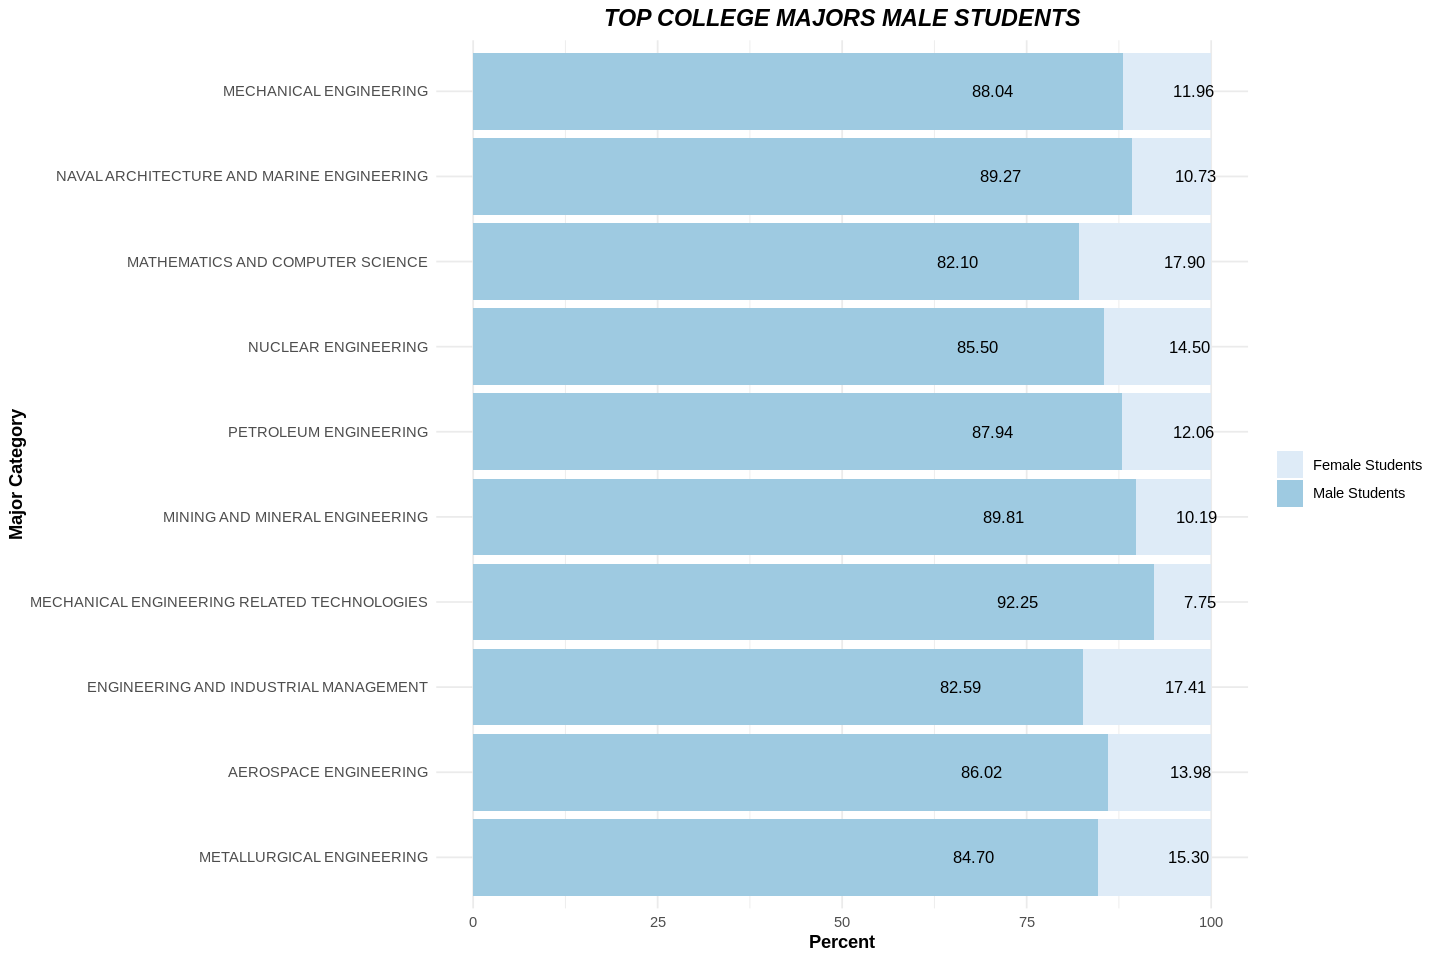

In [18]:
#TOP MEN'S COLLEGE MAJORS PLOT
options(repr.plot.width=12, repr.plot.height=8)
p4 = ggplot(data = mostmen %>% gather(Variable, value, -Major), 
       aes(x = reorder(Major, value), y = value, fill = Variable, some_dummy_mapping = value[Variable])) + geom_bar(stat = 'identity', position = 'stack')

p4 = p4 +  theme(panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank()) 
p4 = p4 + xlab("Major Category") + ylab("Percent") +  geom_text(aes(label=sprintf("%0.2f", round(value, digits = 2))), position= position_stack(vjust = 0.8), size=3.5) + scale_fill_brewer(palette="Blues") + theme_minimal() + theme(plot.title = element_text(hjust = 3)) + theme(legend.title = element_blank()) + coord_flip()

p4 = p4 + theme(plot.title = element_text(size=14, face="bold.italic"), axis.title.x = element_text(face="bold"),
axis.title.y = element_text(face="bold"))
#p4 = ggplotly(p4, tooltip = c("value")) %>% as_widget()
p4 = p4 + ggtitle("TOP COLLEGE MAJORS MALE STUDENTS") + theme(plot.title = element_text(hjust = 0.5))
p4